# Effectualness of Aligned Spin Bank with Higher Modes to Precessing Spin Signals (includes HM)

IMRPhenomXHM bank,  IMRPhenomPv3HM  signals

In [1]:
with open("banksim.ini", 'a') as fout:
    fout.write("""\
[inspinj]
f-lower = 15 
i-distr = fixed
fixed-inc = 0
m-distr = totalMassRatio 
disable-milkyway =
min-mratio = 1. 
max-mratio = 10. 
min-distance = 1000  
l-distr = random  
min-mtotal = 15
waveform = IMRPhenomPv3HM
enable-spin =
; aligned = 
max-mtotal = 100
min-spin1 = 0 
max-spin1 = 0.95
min-spin2 = 0 
max-spin2 = 0.95
max-distance = 1000 
d-distr = uniform 
gps-start-time = 1000000000 
gps-end-time =   1000010000
time-interval = 0. 
time-step = 1. 
seed = 3 

[executables]
banksim = /cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.18.0/bin/pycbc_banksim

[workflow]
accounting-group = ligo.dev.o3.cbc.explore.test
log-path = /home/isha.anantpurkar/FinalAlignedSpinBank/Effectualness/PrecInj_HMBank/logs
;use-gpus =
bank-file = AlignedSpinGeomfaster5_50.xml
injections-per-job = 50
templates-per-job = 500 

[banksim]
psd-model = aLIGOZeroDetHighPower 
template-approximant = IMRPhenomXHM 
; template-phase-order = 7 
; template-amplitude-order = 0 
; template-spin-order = 7
template-start-frequency = 20
template-sample-rate = 16384
signal-approximant = IMRPhenomPv3HM
; signal-phase-order = 7 
; signal-amplitude-order = 0 
; signal-spin-order = 7
signal-sample-rate = 16384
signal-start-frequency = 20
filter-low-frequency = 20
filter-sample-rate = 4096
filter-signal-length = 256
mchirp-window = 0.30
""")

! mkdir logs

In [53]:
! tail -n10 banksim.dag.dagman.out

05/11/21 12:03:07 DAG status: 2 (DAG_STATUS_NODE_FAILED)
05/11/21 12:03:07 Of 7077 nodes total:
05/11/21 12:03:07  Done     Pre   Queued    Post   Ready   Un-Ready   Failed
05/11/21 12:03:07   ===     ===      ===     ===     ===        ===      ===
05/11/21 12:03:07  6710       0        0       0       0         12      355
05/11/21 12:03:07 0 job proc(s) currently held
05/11/21 12:03:07 DAGMan Runtime Statistics: [ EventCycleTimeAvg = 0.6451226641930626; EventCycleTimeCount = 557.0; EventCycleTimeMax = 8.533976078033447; EventCycleTimeMin = 0.0004060268402099609; EventCycleTimeStd = 1.927617611146121; EventCycleTimeSum = 359.3333239555359; LogProcessCycleTimeAvg = 0.0006732675764295789; LogProcessCycleTimeCount = 216.0; LogProcessCycleTimeMax = 0.005398988723754883; LogProcessCycleTimeMin = 0.0001151561737060547; LogProcessCycleTimeStd = 0.0006628154900161157; LogProcessCycleTimeSum = 0.1454257965087891; SleepCycleTimeAvg = 5.004811276653297; SleepCycleTimeCount = 557.0; SleepCycleTi

In [36]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pycbc import pnutils
import numpy as np
import pylab
from pycbc import conversions

In [37]:
res = np.loadtxt("results.dat")
match = res[:,0]

tmass1 = res[:,1]
tmass2 = res[:,2]
tspin1x = res[:,3]
tspin1y = res[:,4]
tspin1z = res[:,5]
tspin2x = res[:,6]
tspin2y = res[:,7]
tspin2z = res[:,8]
tmchirp, teta = pnutils.mass1_mass2_to_mchirp_eta(tmass1, tmass2)

imass1 = res[:,9]
imass2 = res[:,10]
ispin1x = res[:,11]
ispin1y = res[:,12]
ispin1z = res[:,13]
ispin2x = res[:,14]
ispin2y = res[:,15]
ispin2z = res[:,16]
imchirp, ieta = pnutils.mass1_mass2_to_mchirp_eta(imass1, imass2)

q = np.maximum(imass1/imass2, imass2/imass1)
s1m = (ispin1x**2+ispin1y**2+ispin1z**2)**0.5
s2m = (ispin2x**2+ispin2y**2+ispin2z**2)**0.5

In [38]:
len(match)

9350

(array([5.34759358e-04, 2.13903743e-03, 4.91978610e-03, 8.55614973e-03,
        1.21925134e-02, 2.18181818e-02, 5.02673797e-02, 1.33475936e-01,
        2.96684492e-01, 1.00000000e+00]),
 array([0.07188 , 0.164642, 0.257404, 0.350166, 0.442928, 0.53569 ,
        0.628452, 0.721214, 0.813976, 0.906738, 0.9995  ]),
 <a list of 10 Patch objects>)

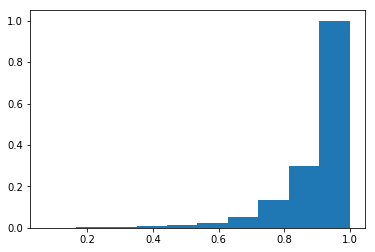

In [39]:
plt.hist(match, cumulative=True, density=True)

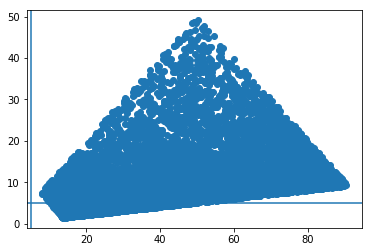

In [40]:
plt.scatter(imass1, imass2)
plt.axhline(5)
plt.axvline(5)

In [41]:
indices = []
for i in range(len(imass2)):
    if imass2[i]<5.0:
        indices.append(i)

In [42]:
match_new=np.delete(match, indices)

tmass1_new = np.delete(tmass1, indices) 
tmass2_new = np.delete(tmass2, indices)
tspin1x_new = np.delete(tspin1x , indices)
tspin1y_new = np.delete(tspin1y , indices)
tspin1z_new = np.delete(tspin1z , indices)
tspin2x_new = np.delete(tspin2x , indices)
tspin2y_new = np.delete(tspin2y , indices)
tspin2z_new = np.delete(tspin2z , indices)
tmchirp_new = np.delete(tmchirp, indices)
teta_new = np.delete(teta , indices)

imass1_new = np.delete(imass1, indices)
imass2_new = np.delete(imass2 , indices)
ispin1x_new = np.delete(ispin1x , indices)
ispin1y_new = np.delete(ispin1y , indices)
ispin1z_new = np.delete(ispin1z , indices)
ispin2x_new = np.delete(ispin2x , indices)
ispin2y_new = np.delete(ispin2y , indices)
ispin2z_new = np.delete(ispin2z , indices)
imchirp_new = np.delete(imchirp, indices) 
ieta_new = np.delete(ieta, indices)
q_new = np.delete(q, indices)
s1m_new = np.delete(s1m , indices)
s2m_new = np.delete(s2m , indices)

(array([6.68806849e-04, 1.47137507e-03, 3.61155698e-03, 1.13697164e-02,
        2.95612627e-02, 7.06260032e-02, 1.46201177e-01, 2.42643125e-01,
        3.96468700e-01, 1.00000000e+00]),
 array([0.49576 , 0.546134, 0.596508, 0.646882, 0.697256, 0.74763 ,
        0.798004, 0.848378, 0.898752, 0.949126, 0.9995  ]),
 <a list of 10 Patch objects>)

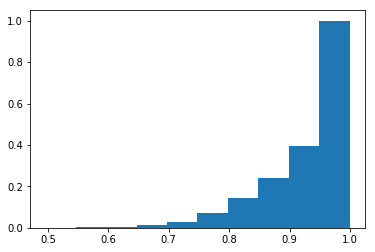

In [43]:
plt.hist(match_new, cumulative=True, density=True)

Text(0.5,1,'Effectualness of Aligned Spin HM Bank')

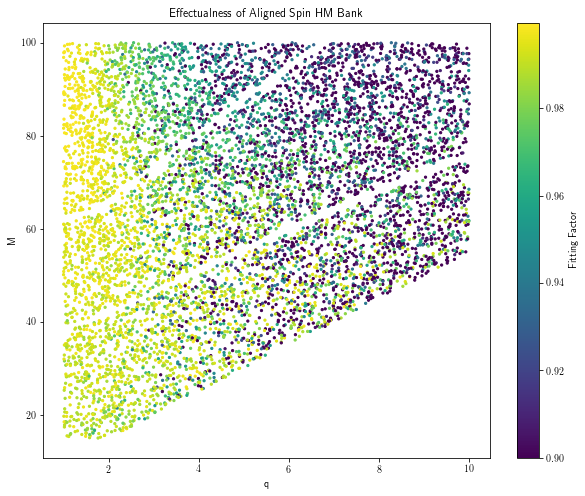

In [44]:
from matplotlib import rc
rc('text', usetex=True)

plt.figure(figsize = (10,8))
plt.scatter(q_new, imass1_new + imass2_new , s=5 ,c = match_new, vmin=0.9)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("q")
plt.ylabel("M")
#plt.xlim([1,8])
plt.title("Effectualness of Aligned Spin HM Bank")

In [45]:
ichi_p_new = conversions.chi_p(imass1_new, imass2_new, ispin1x_new, ispin1y_new, ispin2x_new, ispin2y_new)
ichi_eff_new = conversions.chi_eff(imass1_new, imass2_new, ispin1z_new, ispin2z_new)

Text(0.5,1,'Effectualness of Aligned Spin HM Bank')

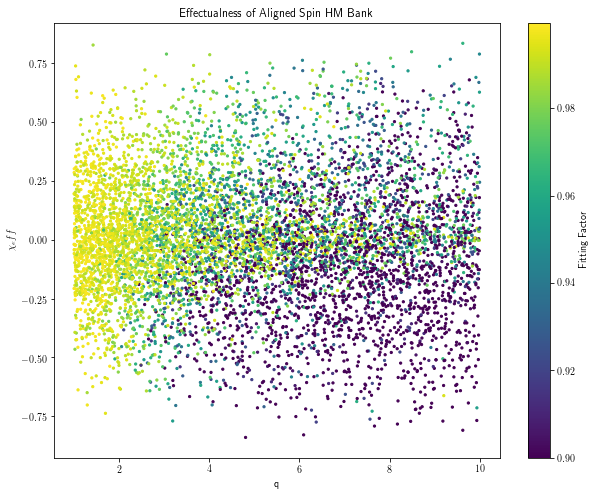

In [47]:
plt.figure(figsize = (10,8))
plt.scatter(q_new, ichi_eff_new , s=5 ,c = match_new, vmin=0.9)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("q")
plt.ylabel("$\\chi_eff$")
#plt.xlim([1,8])
plt.title("Effectualness of Aligned Spin HM Bank")

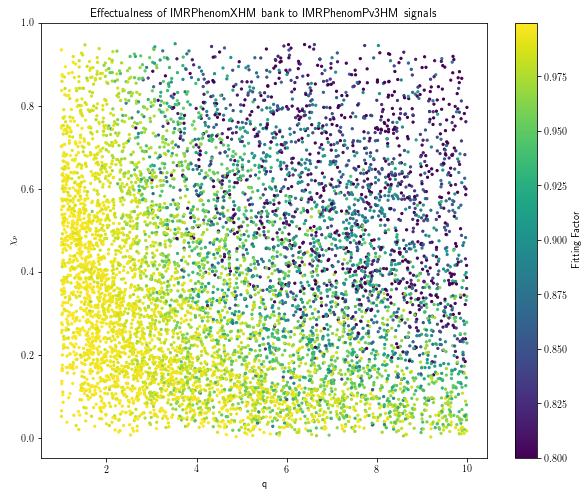

In [55]:
plt.figure(figsize = (10,8))
plt.scatter(q_new, ichi_p_new , s=5 ,c = match_new, vmin=0.80)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("q")
plt.ylabel("$\\chi_p$")
#plt.xlim([1,8])
plt.title("Effectualness of IMRPhenomXHM bank to IMRPhenomPv3HM  signals")
plt.savefig("AlignedSpinHMPrecSignals.png")